<a href="https://colab.research.google.com/github/sorayaForward/Vertex-Cover-with-Local-Search/blob/main/vertex_cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vetex Cover Without LS ( local search )**
**Complexity =  O(V\^3)** \\

Main function implementing the Vertex Cover. It iterates through the graph and selects vertices with the highest degree, removes edges incident to those vertices, and adds the chosen vertices to the cover list c until the graph becomes empty \\

S = [ ] \\
While $G(V,E)$ is a not empty : \
&nbsp;&nbsp;&nbsp;&nbsp;Delete the maximum from V ($S = V - \{\text{max}\}$) \
Return $S$

[{0: 3}, {1: 2}, {2: 3}, {3: 3}, {4: 4}, {5: 4}, {6: 2}, {7: 1}]
[4]
[{0: 2}, {1: 1}, {2: 2}, {3: 2}, {4: 0}, {5: 4}, {6: 2}, {7: 1}]
[4, 5]
[{0: 2}, {1: 1}, {2: 1}, {3: 1}, {4: 0}, {5: 0}, {6: 1}, {7: 0}]
[4, 5, 0]
[{0: 0}, {1: 0}, {2: 0}, {3: 1}, {4: 0}, {5: 0}, {6: 1}, {7: 0}]
[4, 5, 0, 3]


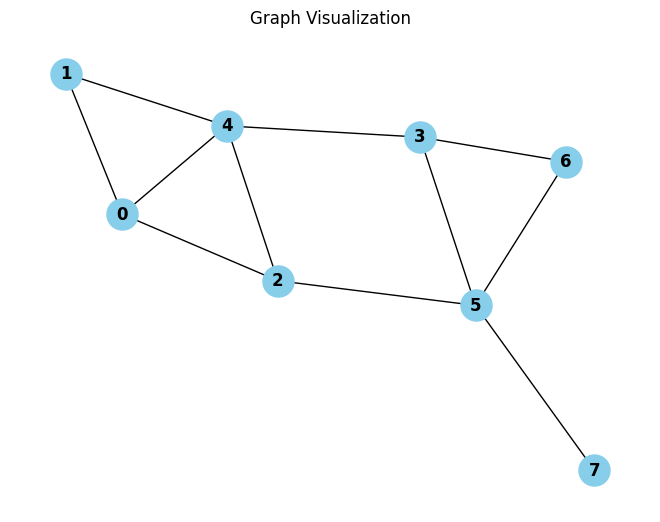

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph
random_graph = nx.gnp_random_graph(8, 0.4)  # Adjust the number of nodes
# Generate the adjacency matrix of the random graph
adj_matrix = nx.adjacency_matrix(random_graph)
# Convert the adjacency matrix to a NumPy array
graph = adj_matrix.toarray()
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(graph)
# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')
# Show the graph
plt.title('Graph Visualization')


def vide( g ): # O(V*V)
    for i in range(len(g)):
        for j in range (len(g[i])):
            if g[i][j] !=0 :  #trouver une seule arête veut dire il n'est pas vide
                return False
    return True

# supprimer toutes les arêtes incidents a u
def remove( g, v ):  # O(V)
    for i in range(len(g[v])) :
            g[v][i] = 0
            g[i][v] = 0

# calculer le nbr d'arretes pour chaque noeud et tirer le maximum
def choix3( g ) : # O(V*V)
    a = []
    nb = 0
    for i in range(len(g)):
        for j in range (len(g[i])):
          if g[i][j] == 1:
            nb = nb + 1
        a.append({i:nb})
        nb = 0
    print(a)
    return list(max(a, key=lambda d: list(d.values())[0]).keys())[0]

def vertexCover( graph ): # O(V*V*V)
    while not vide(graph) :
        n = choix3(graph)
        c.append(n)
        print( c )
        remove(graph,n)

c = []
vertexCover(graph)
plt.show()


# **VERTEX COVER WITH LS**
**Complexity =  O(V\^2)** \\

The algorithm is iteratively removing the vertices with the minimum degree from a random initial solution S0 until the resulting set no longer forms a vertex cover for the graph \\

Generate solution $S_0$ (with any method) \
Sort $S_0$ based on degrees of vertices \
$S = S_0$ \
While $S$ is a solution : \
&nbsp;&nbsp;&nbsp;&nbsp;Delete the minimum ($S = S - \{\text{min}\}$) \
Return $S$




[(0, 1), (0, 2), (0, 6), (0, 9), (1, 2), (1, 5), (1, 9), (2, 4), (2, 6), (3, 4), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (5, 6), (5, 8), (5, 9), (6, 9), (8, 9)]
[3, 8, 0, 1, 2, 4, 5, 6, 9]
[(0, 1), (0, 2), (0, 6), (0, 9), (1, 2), (1, 5), (1, 9), (2, 4), (2, 6), (3, 4), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (5, 6), (5, 8), (5, 9), (6, 9), (8, 9)]
[8, 0, 1, 2, 4, 5, 6, 9]
[(0, 1), (0, 2), (0, 6), (0, 9), (1, 2), (1, 5), (1, 9), (2, 4), (2, 6), (3, 4), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (5, 6), (5, 8), (5, 9), (6, 9), (8, 9)]
Vertex cover: [8, 0, 1, 2, 4, 5, 6, 9, 3]


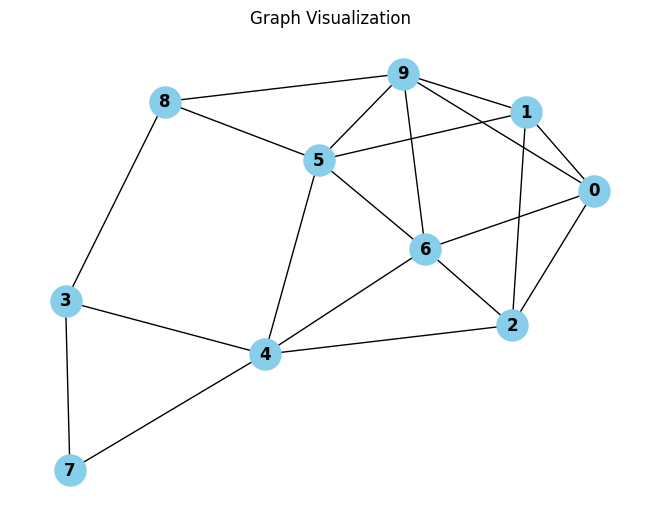

In [ ]:

import networkx as nx
import random

# Create a random graph
random_graph = nx.gnp_random_graph(10, 0.4)
adj_matrix = nx.adjacency_matrix(random_graph)
graph = adj_matrix.toarray()
g = nx.from_numpy_array(graph)
nx.draw(g, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')
plt.title('Graph Visualization')

# Generate a random initial solution S0
def generate_initial_solution(graph): # O(V)
    a = list(range(len(graph.nodes())))
    return a

# Function to sort the solution based on degrees of vertices
def sort_solution_by_degree(graph, solution): # O(V log V)
    sorted_solution = sorted(solution, key=lambda x: graph.degree[x])
    return sorted_solution

def is_vertex_cover(graph, s): # O(E)
    # Iterate through all edges in the graph
    for edge in graph.edges():
        u, v = edge
        # Check if neither of the edge's nodes are in the given solution 's'
        if u not in s and v not in s:
            return False
    return True

def local_search_vertex_cover(graph): # O(V*V)
    # Generate an initial solution S0
    S0 = generate_initial_solution(graph) # random
    # Sort the initial solution based on degrees of vertices
    S = sort_solution_by_degree(graph, S0)
    # while S is a solution try to improve it by deleting one vertex
    while is_vertex_cover(graph, S):
        min_vertex = min(S, key=lambda x: graph.degree[x])
        S.remove(min_vertex)
        print(S)
    S.append(min_vertex)
    return S


# Apply local search algorithm to find the vertex cover
vertex_cover = local_search_vertex_cover(g)
print("Vertex cover:", vertex_cover)
